In [1]:
import pandas as pd

# Load the dataset
file_path = 'data.csv'
house_data = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Get a summary of the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
# Get descriptive statistics of the dataset
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
# Check for missing values
missing_values = house_data.isnull().sum()
missing_values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))]
    return outliers

In [7]:
# Detect outliers for numerical features
numerical_features = house_data.select_dtypes(include=[np.number]).columns.tolist()
outliers_dict = {feature: detect_outliers(house_data, feature) for feature in numerical_features}

In [8]:
# Display the number of outliers for each feature
outliers_count = {feature: len(outliers) for feature, outliers in outliers_dict.items()}
outliers_count

{'price': 240,
 'bedrooms': 118,
 'bathrooms': 141,
 'sqft_living': 129,
 'sqft_lot': 541,
 'floors': 0,
 'waterfront': 33,
 'view': 460,
 'condition': 6,
 'sqft_above': 116,
 'sqft_basement': 82,
 'yr_built': 0,
 'yr_renovated': 0}

In [9]:
# Remove outliers from the dataset
for feature in numerical_features:
    Q1 = house_data[feature].quantile(0.25)
    Q3 = house_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    house_data = house_data[~((house_data[feature] < (Q1 - 1.5 * IQR)) | (house_data[feature] > (Q3 + 1.5 * IQR)))]

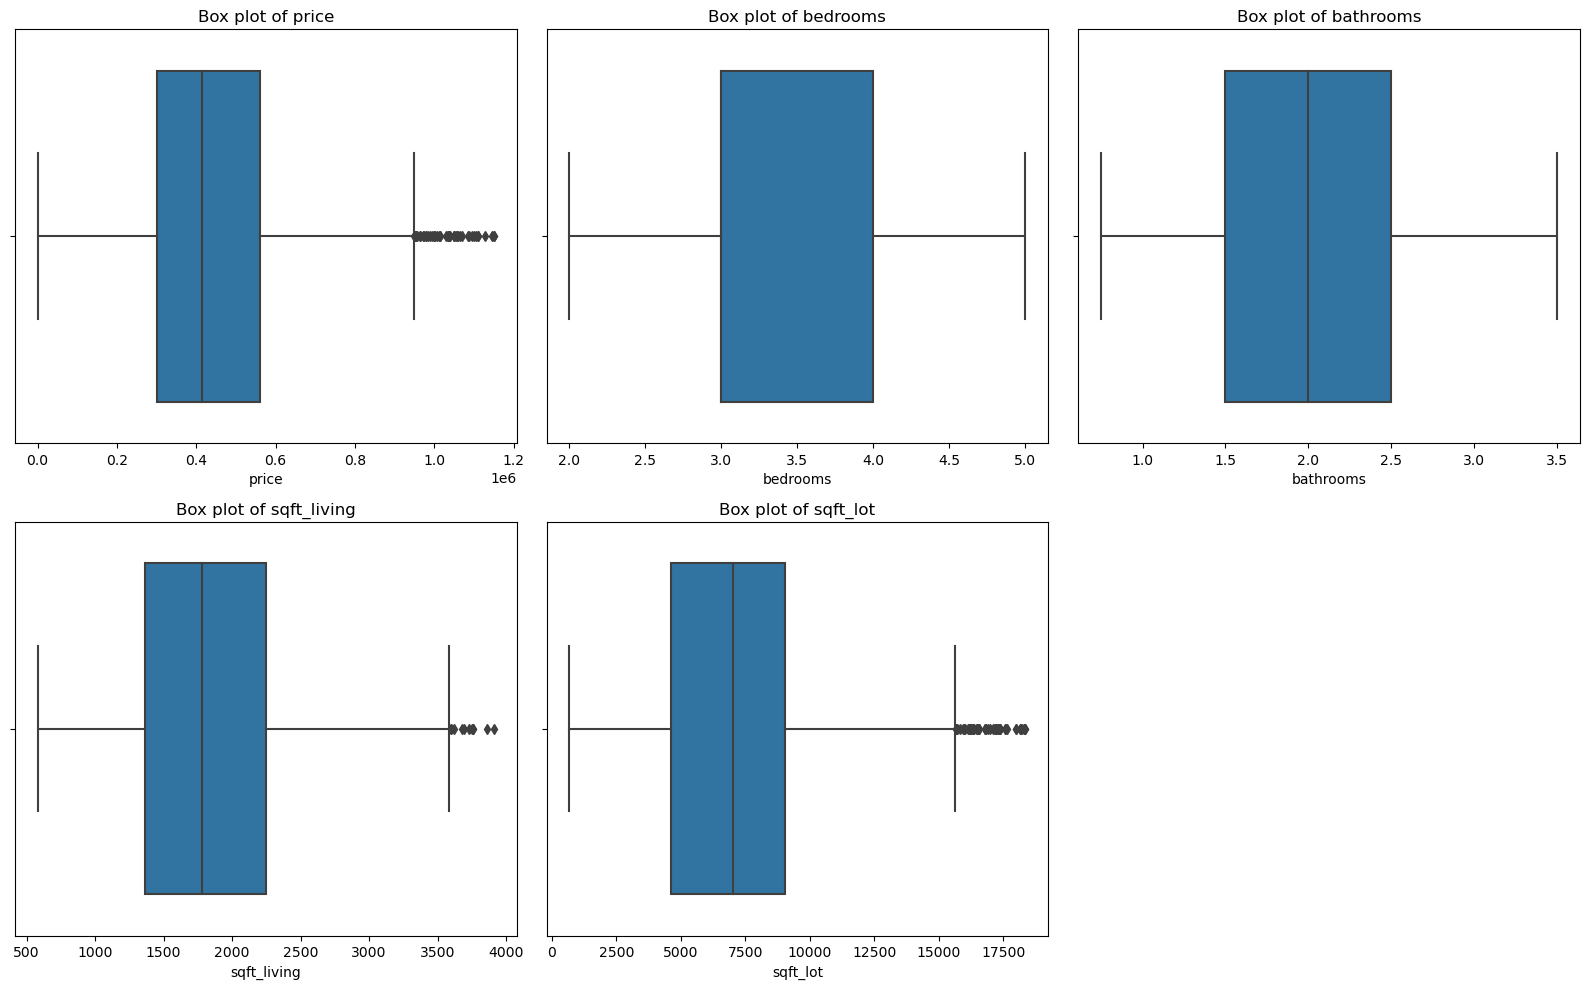

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to visualize
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Create box plots for each feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=house_data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

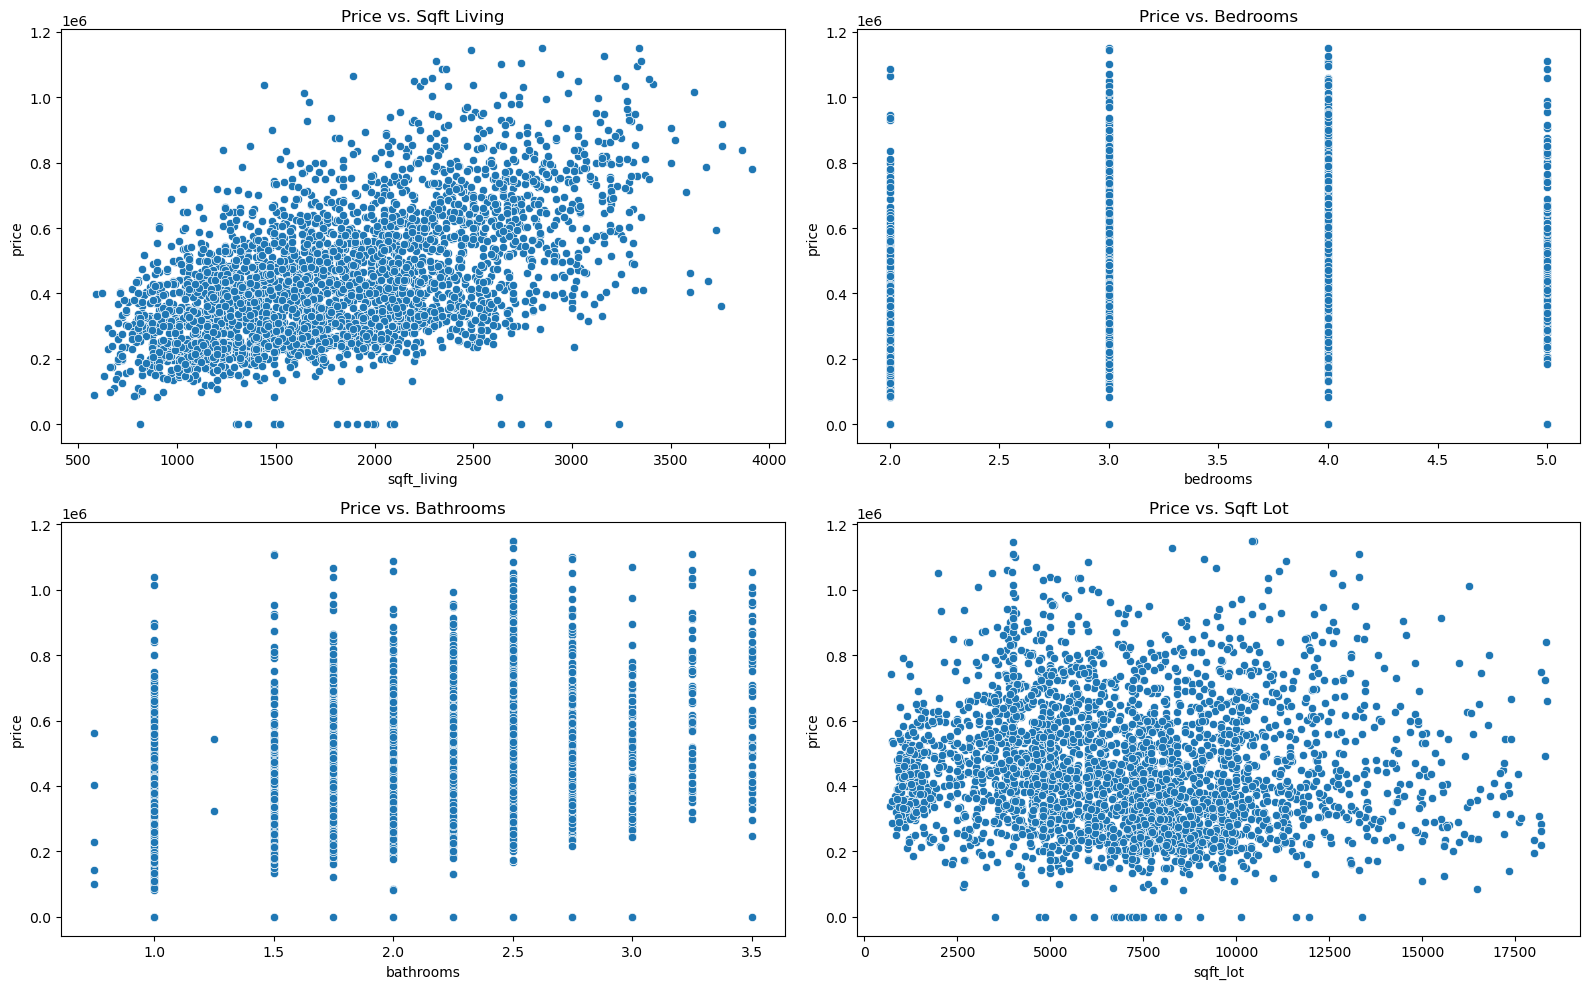

In [11]:
# Scatter plots to visualize outliers
plt.figure(figsize=(16, 10))

# Scatter plot for price vs sqft_living
plt.subplot(2, 2, 1)
sns.scatterplot(x=house_data['sqft_living'], y=house_data['price'])
plt.title('Price vs. Sqft Living')

# Scatter plot for price vs bedrooms
plt.subplot(2, 2, 2)
sns.scatterplot(x=house_data['bedrooms'], y=house_data['price'])
plt.title('Price vs. Bedrooms')

# Scatter plot for price vs bathrooms
plt.subplot(2, 2, 3)
sns.scatterplot(x=house_data['bathrooms'], y=house_data['price'])
plt.title('Price vs. Bathrooms')

# Scatter plot for price vs sqft_lot
plt.subplot(2, 2, 4)
sns.scatterplot(x=house_data['sqft_lot'], y=house_data['price'])
plt.title('Price vs. Sqft Lot')

plt.tight_layout()
plt.show()

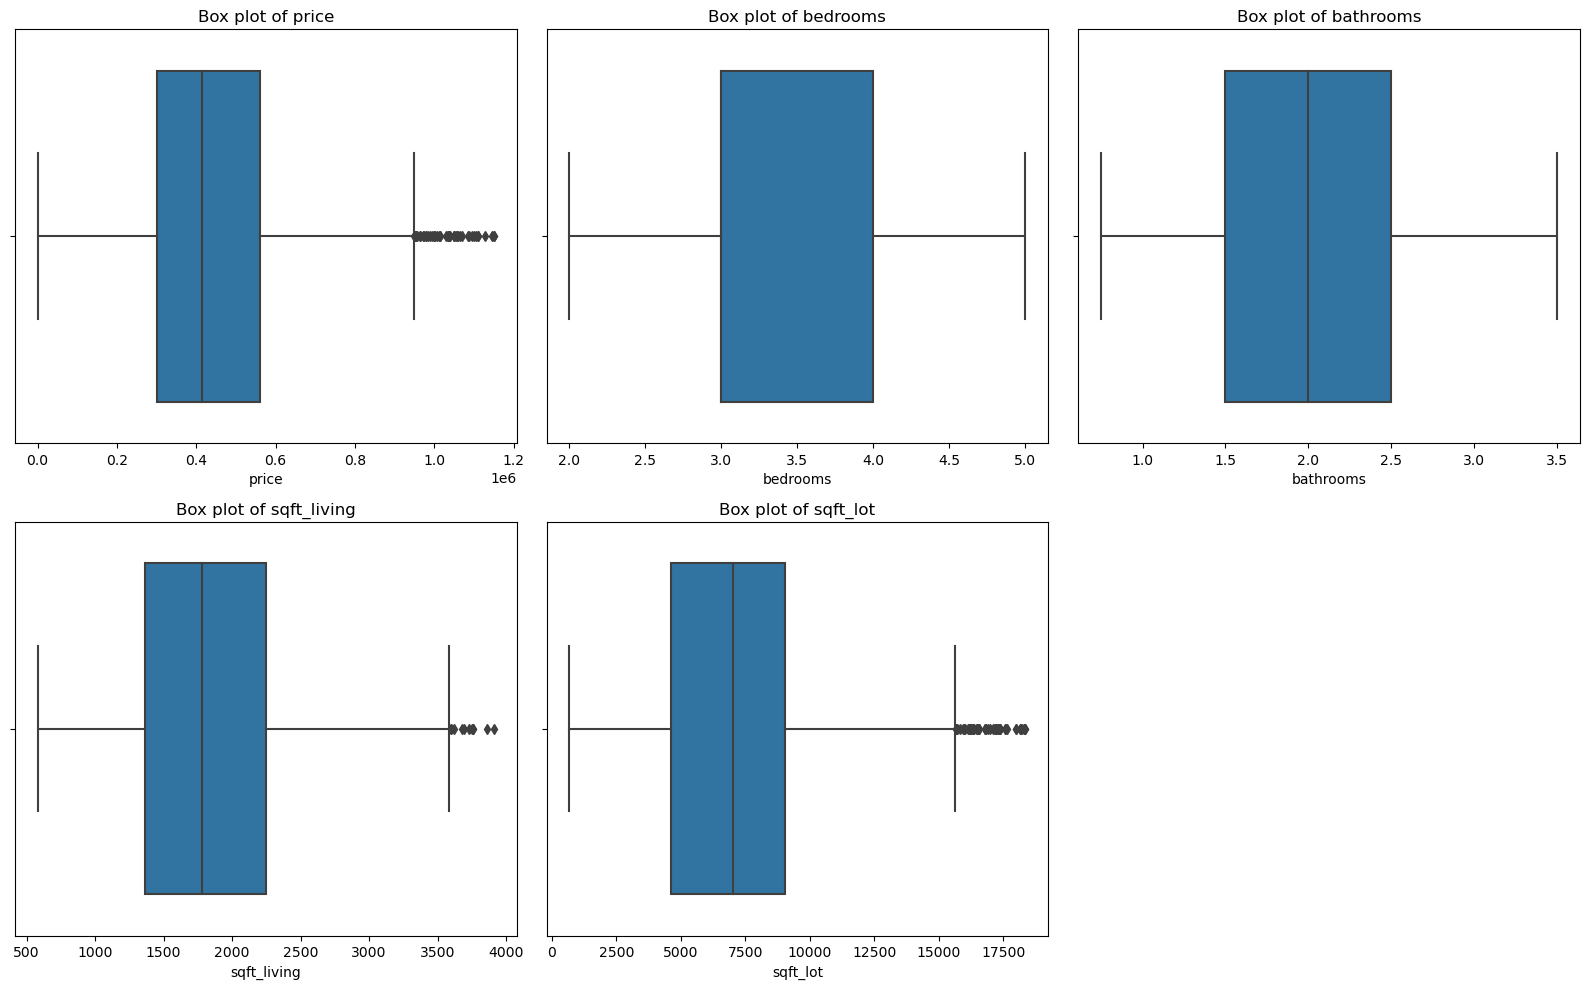

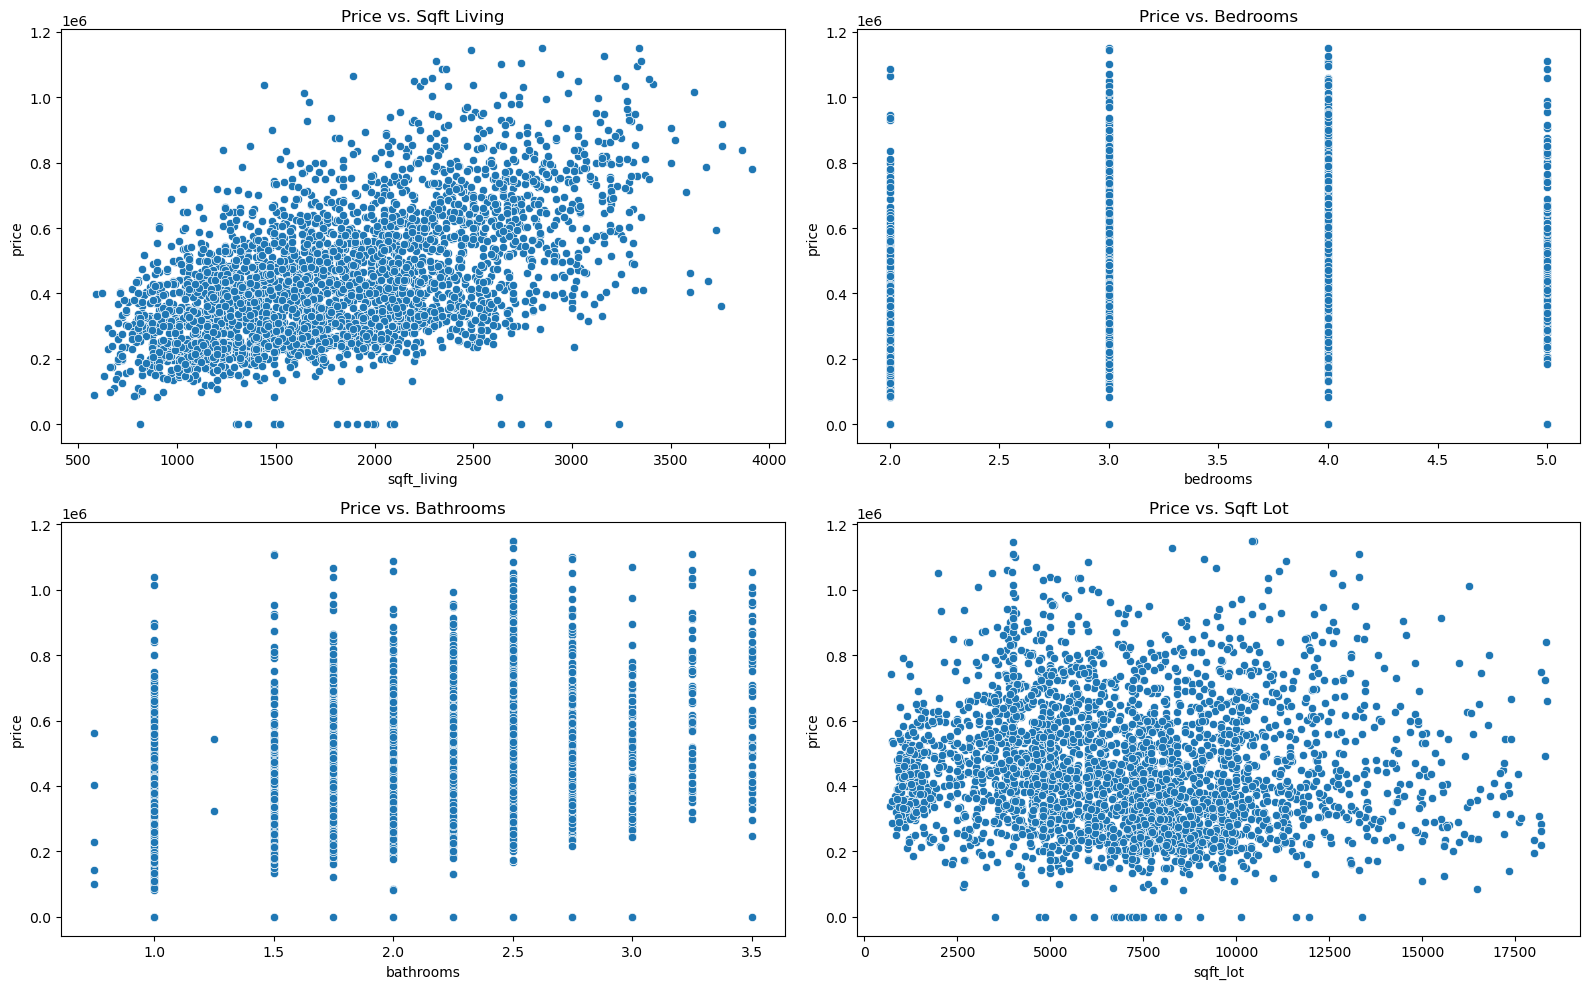

In [13]:
# Box Plot for Outliers
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=house_data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

# Scatter Plot for Outliers
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x=house_data['sqft_living'], y=house_data['price'])
plt.title('Price vs. Sqft Living')

plt.subplot(2, 2, 2)
sns.scatterplot(x=house_data['bedrooms'], y=house_data['price'])
plt.title('Price vs. Bedrooms')

plt.subplot(2, 2, 3)
sns.scatterplot(x=house_data['bathrooms'], y=house_data['price'])
plt.title('Price vs. Bathrooms')

plt.subplot(2, 2, 4)
sns.scatterplot(x=house_data['sqft_lot'], y=house_data['price'])
plt.title('Price vs. Sqft Lot')

plt.tight_layout()
plt.show()


In [14]:
# Remove outliers from the dataset
for feature in numerical_features:
    Q1 = house_data[feature].quantile(0.25)
    Q3 = house_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    house_data = house_data[~((house_data[feature] < (Q1 - 1.5 * IQR)) | (house_data[feature] > (Q3 + 1.5 * IQR)))]

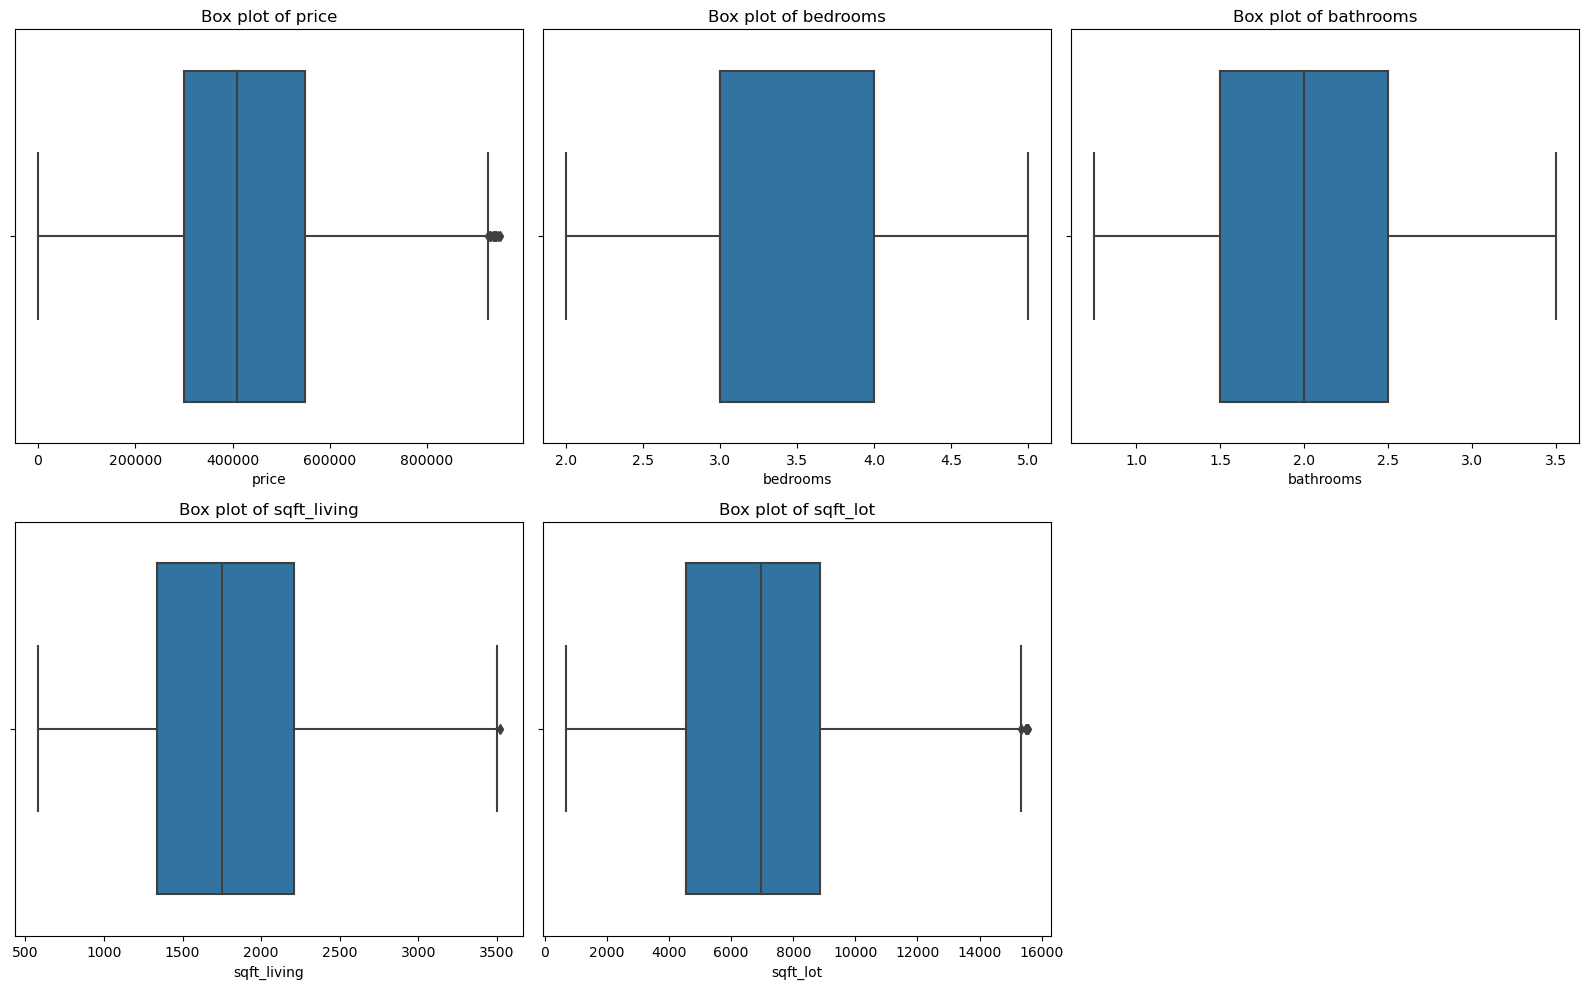

In [15]:
# Box Plot for Outliers After Removal
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=house_data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

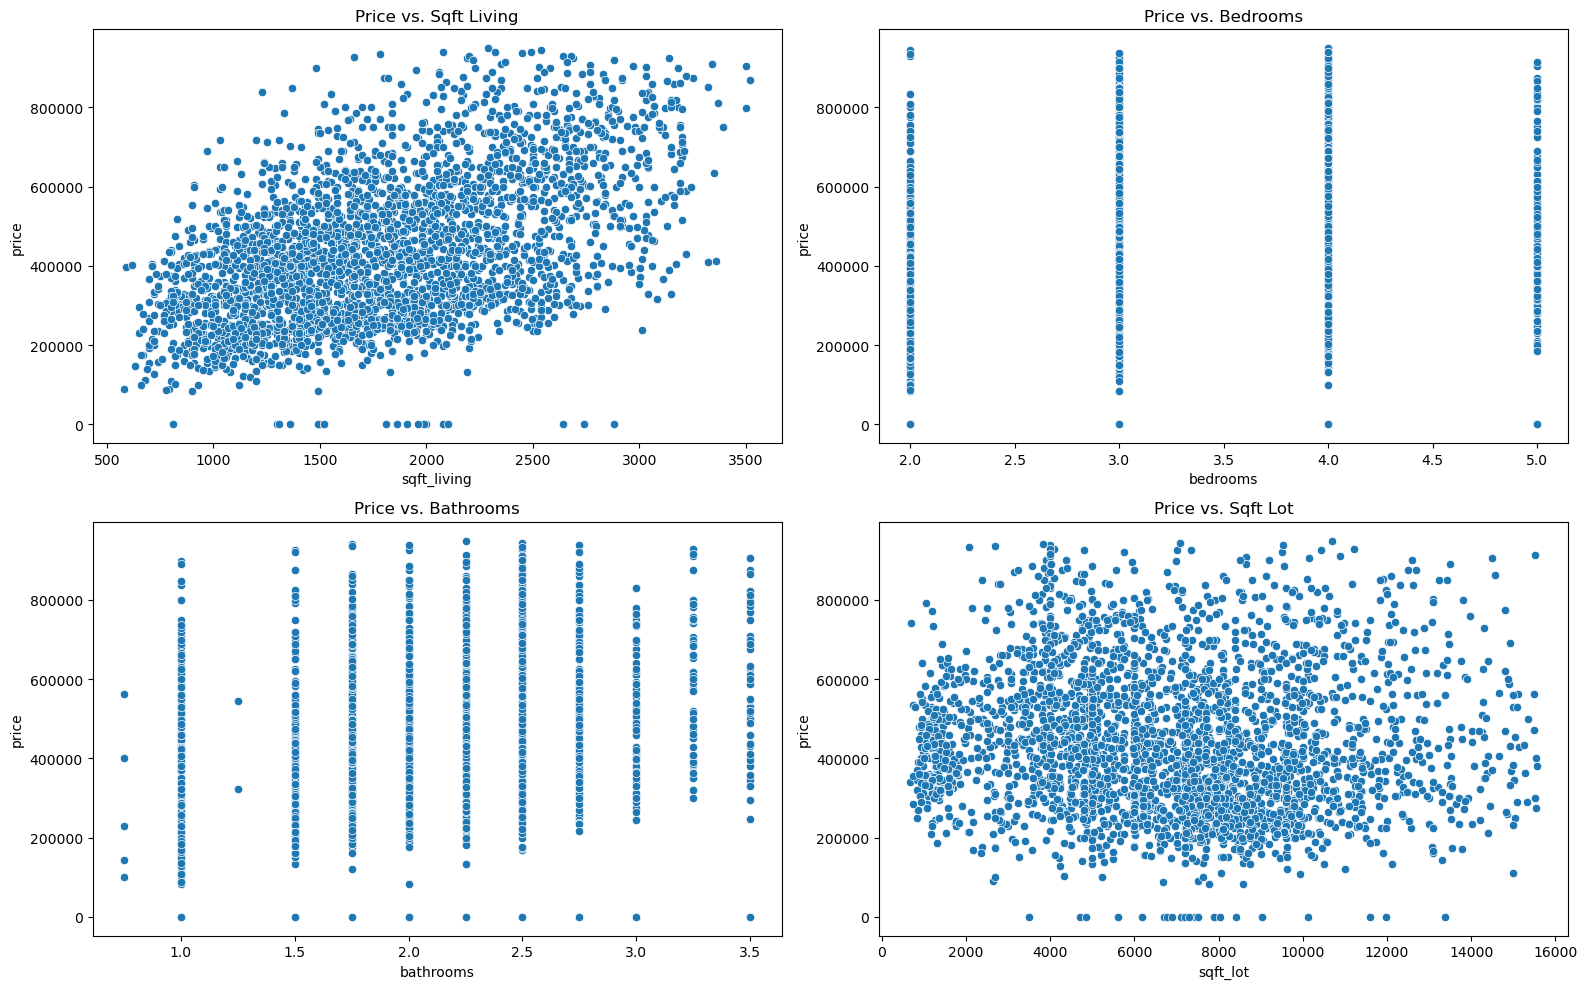

In [16]:
# Scatter Plot for Outliers After Removal
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x=house_data['sqft_living'], y=house_data['price'])
plt.title('Price vs. Sqft Living')

plt.subplot(2, 2, 2)
sns.scatterplot(x=house_data['bedrooms'], y=house_data['price'])
plt.title('Price vs. Bedrooms')

plt.subplot(2, 2, 3)
sns.scatterplot(x=house_data['bathrooms'], y=house_data['price'])
plt.title('Price vs. Bathrooms')

plt.subplot(2, 2, 4)
sns.scatterplot(x=house_data['sqft_lot'], y=house_data['price'])
plt.title('Price vs. Sqft Lot')

plt.tight_layout()
plt.show()

In [17]:
# Verify the number of records after outlier removal
house_data.shape

(3159, 18)

In [18]:
# One-hot encode categorical features
house_data_encoded = pd.get_dummies(house_data, drop_first=True)
house_data_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,...,False,False,False,False,False,False,False,False,False,False


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Initialize the scaler
scaler = StandardScaler()

In [21]:
# Identify numerical features for scaling
numerical_features_scaled = house_data_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_features_scaled.remove('price')  # Exclude the target variable

In [22]:
# Scale the numerical features
house_data_encoded[numerical_features_scaled] = scaler.fit_transform(house_data_encoded[numerical_features_scaled])

In [23]:
# Display the scaled dataset
house_data_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,-0.314762,-0.750546,-0.782480,0.343467,0.026891,0.0,0.0,-0.677238,-0.394372,...,False,False,False,False,False,False,False,False,False,False
2,342000.0,-0.314762,0.026313,0.219879,1.617558,-0.886527,0.0,0.0,0.829378,0.605517,...,False,False,False,False,False,False,False,False,False,False
3,420000.0,-0.314762,0.414743,0.338803,0.380727,-0.886527,0.0,0.0,0.829378,-0.970579,...,False,False,False,False,False,False,False,False,False,False
4,550000.0,0.995296,0.803173,0.236868,1.160654,-0.886527,0.0,0.0,0.829378,-0.733318,...,False,False,False,False,False,False,False,False,False,False
5,490000.0,-1.624821,-1.527405,-1.563980,-0.140277,-0.886527,0.0,0.0,-0.677238,-1.173947,...,False,False,False,False,False,False,False,False,False,False


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Define features and target variable
X = house_data_encoded.drop('price', axis=1)
y = house_data_encoded['price']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2527, 3301), (632, 3301), (2527,), (632,))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [28]:
# Initialize the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [29]:
# Function to train and evaluate models
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return mse, rmse

In [30]:
# Train and evaluate models
mse_linear, rmse_linear = train_evaluate(linear_model, X_train, y_train, X_test, y_test)
mse_rf, rmse_rf = train_evaluate(rf_model, X_train, y_train, X_test, y_test)
mse_gb, rmse_gb = train_evaluate(gb_model, X_train, y_train, X_test, y_test)

In [31]:
# Compare results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'RMSE': [rmse_linear, rmse_rf, rmse_gb]
})

results

,Model,MSE,RMSE
0,Linear Regression,1.161706e+10,107782.476725
1,Random Forest,9.947095e+09,99735.123815
2,Gradient Boosting,9.309160e+09,96483.987865


In [32]:
from sklearn.decomposition import PCA

In [33]:
# Apply PCA to reduce the number of features
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
# Train and evaluate models with reduced features
mse_linear, rmse_linear = train_evaluate(linear_model, X_train_pca, y_train, X_test_pca, y_test)
mse_rf, rmse_rf = train_evaluate(rf_model, X_train_pca, y_train, X_test_pca, y_test)
mse_gb, rmse_gb = train_evaluate(gb_model, X_train_pca, y_train, X_test_pca, y_test)

In [35]:
# Compare results
results_pca = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_linear, mse_rf, mse_gb],
    'RMSE': [rmse_linear, rmse_rf, rmse_gb]
})

results_pca

,Model,MSE,RMSE
0,Linear Regression,1.209728e+10,109987.637572
1,Random Forest,1.260158e+10,112256.776243
2,Gradient Boosting,1.214346e+10,110197.375807


In [39]:
from flask import Flask, request, jsonify

In [40]:
import pickle

In [41]:
app = Flask(__name__)

In [42]:
# Load the trained model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [43]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction[0]})

In [45]:
# Save the best model (Random Forest in this case)
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)